In [1]:
# =============================================================================
# COMPUTATION OF THE EIGENVALUES FOR r1, r0 OR t1, t0
# =============================================================================

import numpy as np
import sympy as sp
import math
#Urakawa: t1=t0=r0=2
#Canonical Variation of Semmelmann: r0=t0=1/2

η,r1,r0,t1,t0, α, δ =sp.symbols('η r1 r0 t1 t0 α δ', positive=True)
#r0=t0=1/2 
#t1=1
#r0=2, r1 = float('inf') (i.e. r1\rightarrow \infity ) is the case computed by Urakawa.
#t1=2
#r0=t0
#r1=(t1*t0)/(t0-t1)  #formula for finite r1. leave commented if symbolical computations for r1 are wished. Uncomment if symbolic computations for t1 are wished or choose a certain value.
#r1 = float('inf') #this is the limit r1\rightarrow \infity. leave commented if symbolical computations are wished.
t0=1
#t1=1
#t0=1/(2*α*δ)
#t1=1/(δ**2)

def p(a1, a2): #computation of the partition function
    if a1 % 3 != 0:
        return 0

    count = 0
    for m1 in range(0, (a1 // 3) + 1):
        m3 = a2 + m1 + 2 * ((a1 - 3 * m1) // 3)
        if m3 >= 0:
            count += 1
    return count

def m(z1,z2,z3):    #Computation if (z1,z2,z3) is a spherical representation. m(z1,z2,z3) denotes how often the trivial representation occurs when restricted to U(2).
    return p(z1+z2,-z3-(z1+2)) + p(z1-2*z2-3,(z2+1)-z3) +p((z2-2*z1-6),-z3+(-z2+z1+1)) - p(z1+z2,-z3-(z2+1)) - p(z1-2*z2-3,(z2-1-z1)-z3) -p((z2-2*z1-6),(z1+2-z3)) - p(z1+z2,z3-(z1+1)) - p(z1-2*z2-3,z2+2+z3) -p((z2-2*z1-6),((z1-z2)+2+z3)) + p(z1+z2,z3-z2) + p(z1-2*z2-3,(z2-z1)+z3) + p((z2-2*z1-6),(z1+3+z3))
def mult(z1,z2,z3): #computation of the dimension of the eigenspace realizing m(z1,z2,z3) many (z1,z2,z3) modules.
    return (m(z1,z2,z3))*(z1-z2+1)*(z1+2)*(z2+1)*(2*z3+1)/2   #This and the formula for eigenvalues agree with Urakawa for z3=0 and r1\rightarrow \infity.

def η(z1, z2, z3, t0, t1): #computation of the eigenvalue
        return 4*(z3**2 + z3) /  t1 + 4 * (z1**2 + z2**2 - z1 * (z2 - 3)) / (3 * t0) -4*(z3**2 + z3) /  t0

def η_h(z1, z2, z3, r1, r0): #computation of the eigenvalue of the horizontal Laplacian
        return η(z1, z2, z3, t0, t1)-4*(z3**2 + z3) / t1

results = [] #creating the set of eigenvalues
for z1 in range(0, 60):
    for z2 in range(0, 60):
        for z3 in range(0, 60):
            m_value = m(z1, z2, z3)
            if m_value > 0 and z1>=z2:        #if (z1,z2,z3) is a spherical representation (i.e. m(z1,z2,z3)>0) this gives an eigenvalue
                η_value = η(z1, z2, z3,t0,t1)
                η_valueh = η(z1, z2, z3,t0,t1)-4*(z3**2 + z3) /  t1
                results.append((z1, z2, z3,  η_value,η_valueh,mult(z1,z2,z3)))
#results.sort(key=lambda x: x[3]) # Sort list by size of η. ATTENTION: This is not possible if symbolic computations are done.
results.sort(key=lambda x: x[4]) # Sort list by size of η_h. ATTENTION: This is not possible if symbolic computations are done.
# Print the header
print("{:<20} {:<30} {:<30} {:<20}".format("(z1, z2, z3)", "η(z1,z2,z3,t0,t1)", "η_h(z1,z2,z3,t0,t1)", "mult(z1,z2,z3)"))
#print('-' * 70)  # a separator line

# Print the eigenvalues
for result in results:
    z_values = f"({result[0]}, {result[1]}, {result[2]})"
    eta_value = str(result[3])  # Convert symbolic expression to string (i.e. making symbolic computations possible.)
    eta_valueh = str(result[4])  
    mult_value = str(result[5]) 
    print("{:<20} {:<30} {:<30} {:<20}".format(z_values, eta_value, eta_valueh, mult_value))

# Print the eigenvalues of the horizontal Laplacian
#print("{:<20} {:<30}".format("(z1, z2, z3)", "η_h(z1,z2,z3,t0,t1)"))
#print('-' * 70)  # a separator line
#for result in resultsh:
#    z_values = f"({result[0]}, {result[1]}, {result[2]})"
#    eta_value = str(result[3])  # Convert symbolic expression to string (i.e. making symbolic computations possible.)
#    print("{:<20} {:<30}".format(z_values, eta_value, mult_value))


(z1, z2, z3)         η(z1,z2,z3,t0,t1)              η_h(z1,z2,z3,t0,t1)            mult(z1,z2,z3)      
(0, 0, 0)            0                              0                              1.0                 
(2, 1, 1)            4.0 + 8/t1                     4.00000000000000               24.0                
(4, 2, 2)            8.0 + 24/t1                    8.00000000000000               135.0               
(2, 1, 0)            12.0000000000000               12.0000000000000               8.0                 
(6, 3, 3)            12.0 + 48/t1                   12.0000000000000               448.0               
(3, 0, 1)            16.0 + 8/t1                    16.0000000000000               30.0                
(3, 3, 1)            16.0 + 8/t1                    16.0000000000000               30.0                
(8, 4, 4)            16.0 + 80/t1                   16.0000000000000               1125.0              
(10, 5, 5)           20.0 + 120/t1                  20.000000000

In [4]:
# =========================================================================================================
# COMPARISON IF THE MULTIPLCITIES OF THE DECOMPOSED REPRESENTATIONS ADD UP TO THE ONES COMPUTED BY URAKAWA
#==========================================================================================================

# ================================ Our results ================================

def p(a1, a2): #computation of the partition function
    if a1 % 3 != 0:
        return 0

    count = 0
    for m1 in range(0, (a1 // 3) + 1):
        m3 = a2 + m1 + 2 * ((a1 - 3 * m1) // 3)
        if m3 >= 0:
            count += 1
    return count

def m(z1, z2, z3):  # Computation if (z1,z2,z3) is a spherical representation and how often the trivial rep occurs
    return p(z1+z2,-z3-(z1+2)) + p(z1-2*z2-3,(z2+1)-z3) +p((z2-2*z1-6),-z3+(-z2+z1+1)) - p(z1+z2,-z3-(z2+1)) - p(z1-2*z2-3,(z2-1-z1)-z3) -p((z2-2*z1-6),(z1+2-z3)) - p(z1+z2,z3-(z1+1)) - p(z1-2*z2-3,z2+2+z3) -p((z2-2*z1-6),((z1-z2)+2+z3)) + p(z1+z2,z3-z2) + p(z1-2*z2-3,(z2-z1)+z3) + p((z2-2*z1-6),(z1+3+z3))

def mult(z1, z2, z3):  # Computation of the multiplicites of each representation
    return (m(z1,z2,z3))*(z1-z2+1)*(z1+2)*(z2+1)*(2*z3+1)/2

#Computing the rest in a loop:

max_range = 80  # Adjust this value depending on your computational resources

grouped_results_first_method = {} #this is a dictronary where the key is supposed to be (z1,z2) and the value is m(z1,z2,z3)
for z1 in range(0, max_range):
    for z2 in range(0, max_range):
        for z3 in range(0, max_range):
            m_value = m(z1, z2, z3)
            if m_value > 0 and z1 >= z2: #this is precisely the case if we have a U(2)-spherical representation
                mult_value = mult(z1, z2, z3) 
                key = (z1, z2) #we want to add up the multiplicites of two representations with the same z1, z2 value
                if key not in grouped_results_first_method:
                    grouped_results_first_method[key] = 0
                grouped_results_first_method[key] += mult_value #here we change the value of the key (z1,z2) the mult_value.

# ================================ Results of Urakawa ================================
#here we use the same code again as we do not need to add up any multiplicities.
from sympy import symbols

k, l = symbols('k l', integer=True)
k = 1
l = 1

def d(z1, z2):
    return (z1 - z2 + 1) * (z1 + 2) * (z2 + 1) / 2

results_second_method = set()

for n_1 in range(0, max_range): 
    for n_2 in range(0, max_range):
        count = 0
        for P in range(n_1 + 1):
            for q in range(n_2 + 1):
                for r in range(P + n_2 - q + 1):
                    if k * n_1 - l * n_2 - (2 * k + l) * P + (l - k) * q + (k + 2 * l) * r == 0:
                        count += 1
        if count > 0:
            z1 = n_1 + n_2
            z2 = n_2
            mult_value = d(z1, z2) * count
            results_second_method.add((z1, z2, mult_value))

grouped_results_second_method = {(z1, z2): mult for z1, z2, mult in results_second_method} #here we construct a second dictionary with the results of Urakawa: (z1,z2) are the keys, the multiplicites are the values.

# ================================ Comparison of the multiplicites ================================

comparison_results = {}

for key in grouped_results_first_method: 
    value_from_first_method = grouped_results_first_method[key]
    
    #for each key of the first method (our method) we search for the key of the second method (Urakawas method) and compare their values
    if key in grouped_results_second_method:
        value_from_second_method = grouped_results_second_method[key]
        values_match = value_from_first_method == value_from_second_method #the key becomes a key of the new dictionary and its values are the values of the first dic, the second dic and the last one checks if both coincide.
    else: #if we can not find the key of the first method in the second method
        value_from_second_method = None
        values_match = False

    comparison_results[key] = (value_from_first_method, value_from_second_method, values_match)

# Sort so that "False" entries are displayed first

sorted_comparison = sorted(comparison_results.items(), key=lambda x: x[1][2]) # When sorting based on boolean values using the 'sorted' function, items with the value 'False' (which corresponds to 0) come before items with the value 'True' (which corresponds to 1).

# Output the sorted results
for key, value in sorted_comparison:
    print(key, ":", value)


(0, 0) : (1.0, 1.0, True)
(2, 1) : (32.0, 32.0, True)
(3, 0) : (30.0, 30.0, True)
(3, 3) : (30.0, 30.0, True)
(4, 2) : (243.0, 243.0, True)
(5, 1) : (280.0, 280.0, True)
(5, 4) : (280.0, 280.0, True)
(6, 0) : (140.0, 140.0, True)
(6, 3) : (1024.0, 1024.0, True)
(6, 6) : (140.0, 140.0, True)
(7, 2) : (1215.0, 1215.0, True)
(7, 5) : (1215.0, 1215.0, True)
(8, 1) : (960.0, 960.0, True)
(8, 4) : (3125.0, 3125.0, True)
(8, 7) : (960.0, 960.0, True)
(9, 0) : (385.0, 385.0, True)
(9, 3) : (3696.0, 3696.0, True)
(9, 6) : (3696.0, 3696.0, True)
(9, 9) : (385.0, 385.0, True)
(10, 2) : (3402.0, 3402.0, True)
(10, 5) : (7776.0, 7776.0, True)
(10, 8) : (3402.0, 3402.0, True)
(11, 1) : (2288.0, 2288.0, True)
(11, 4) : (9100.0, 9100.0, True)
(11, 7) : (9100.0, 9100.0, True)
(11, 10) : (2288.0, 2288.0, True)
(12, 0) : (819.0, 819.0, True)
(12, 3) : (8960.0, 8960.0, True)
(12, 6) : (16807.0, 16807.0, True)
(12, 9) : (8960.0, 8960.0, True)
(12, 12) : (819.0, 819.0, True)
(13, 2) : (7290.0, 7290.0, True)

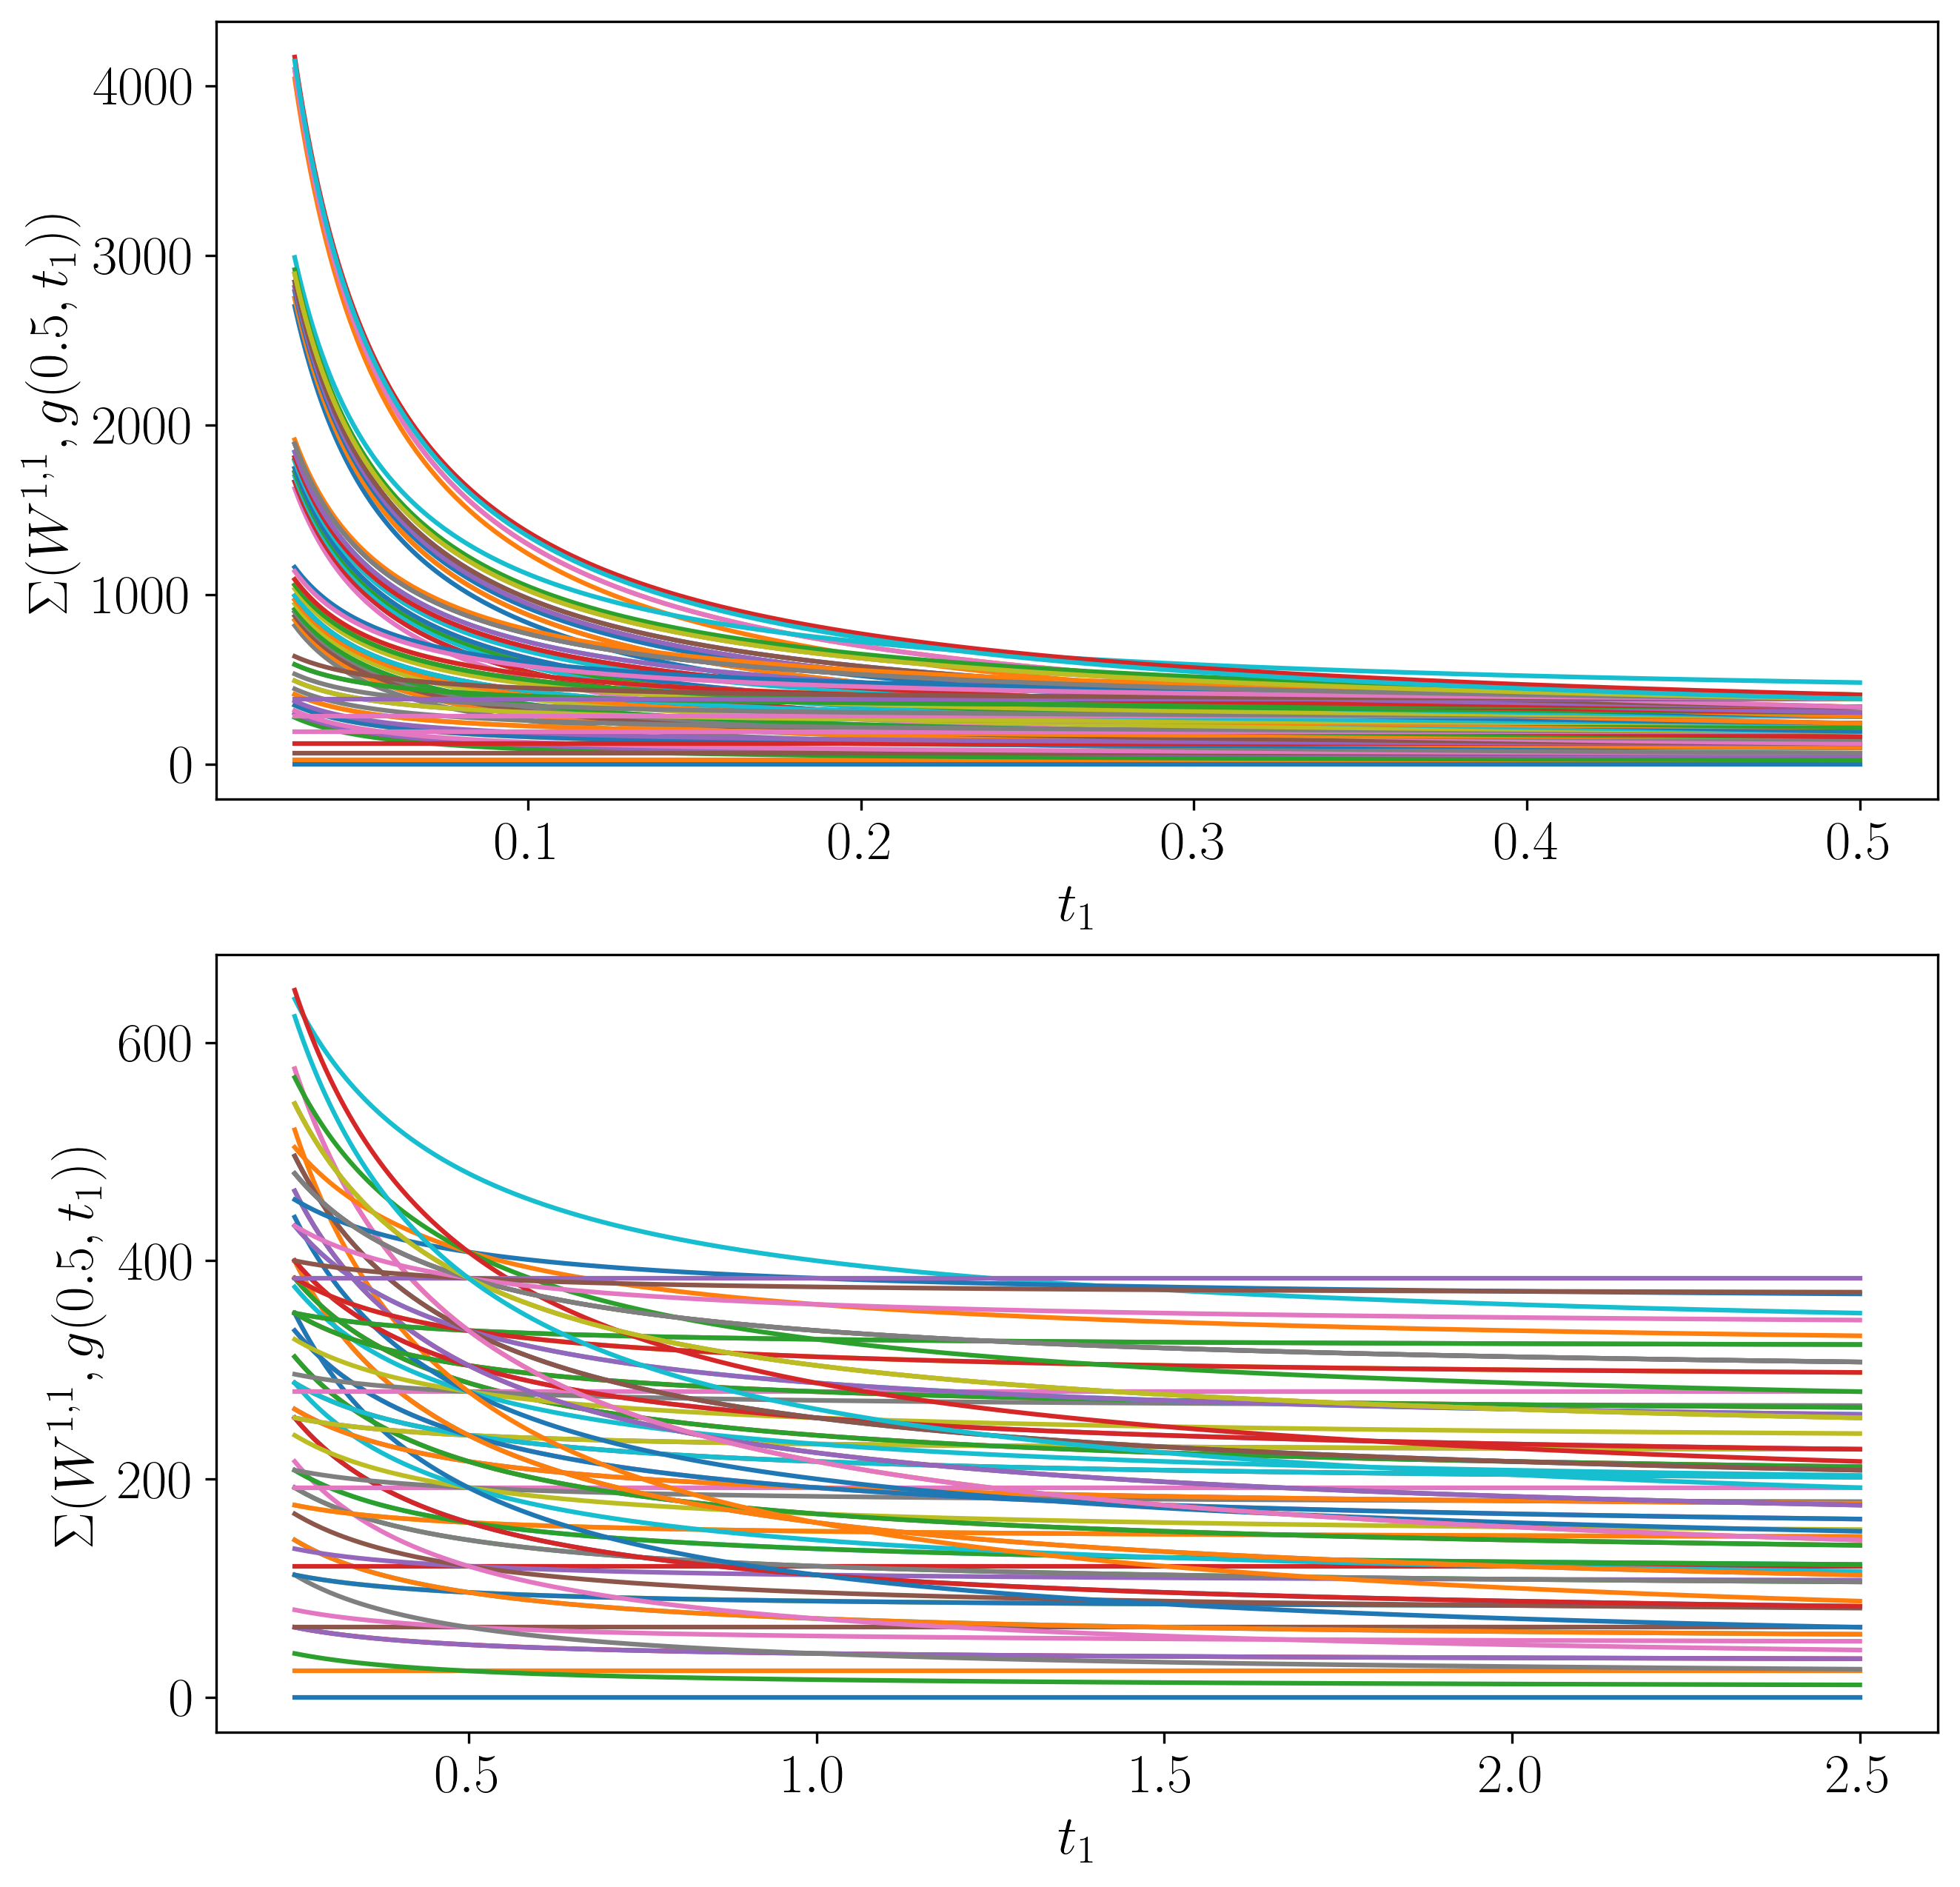

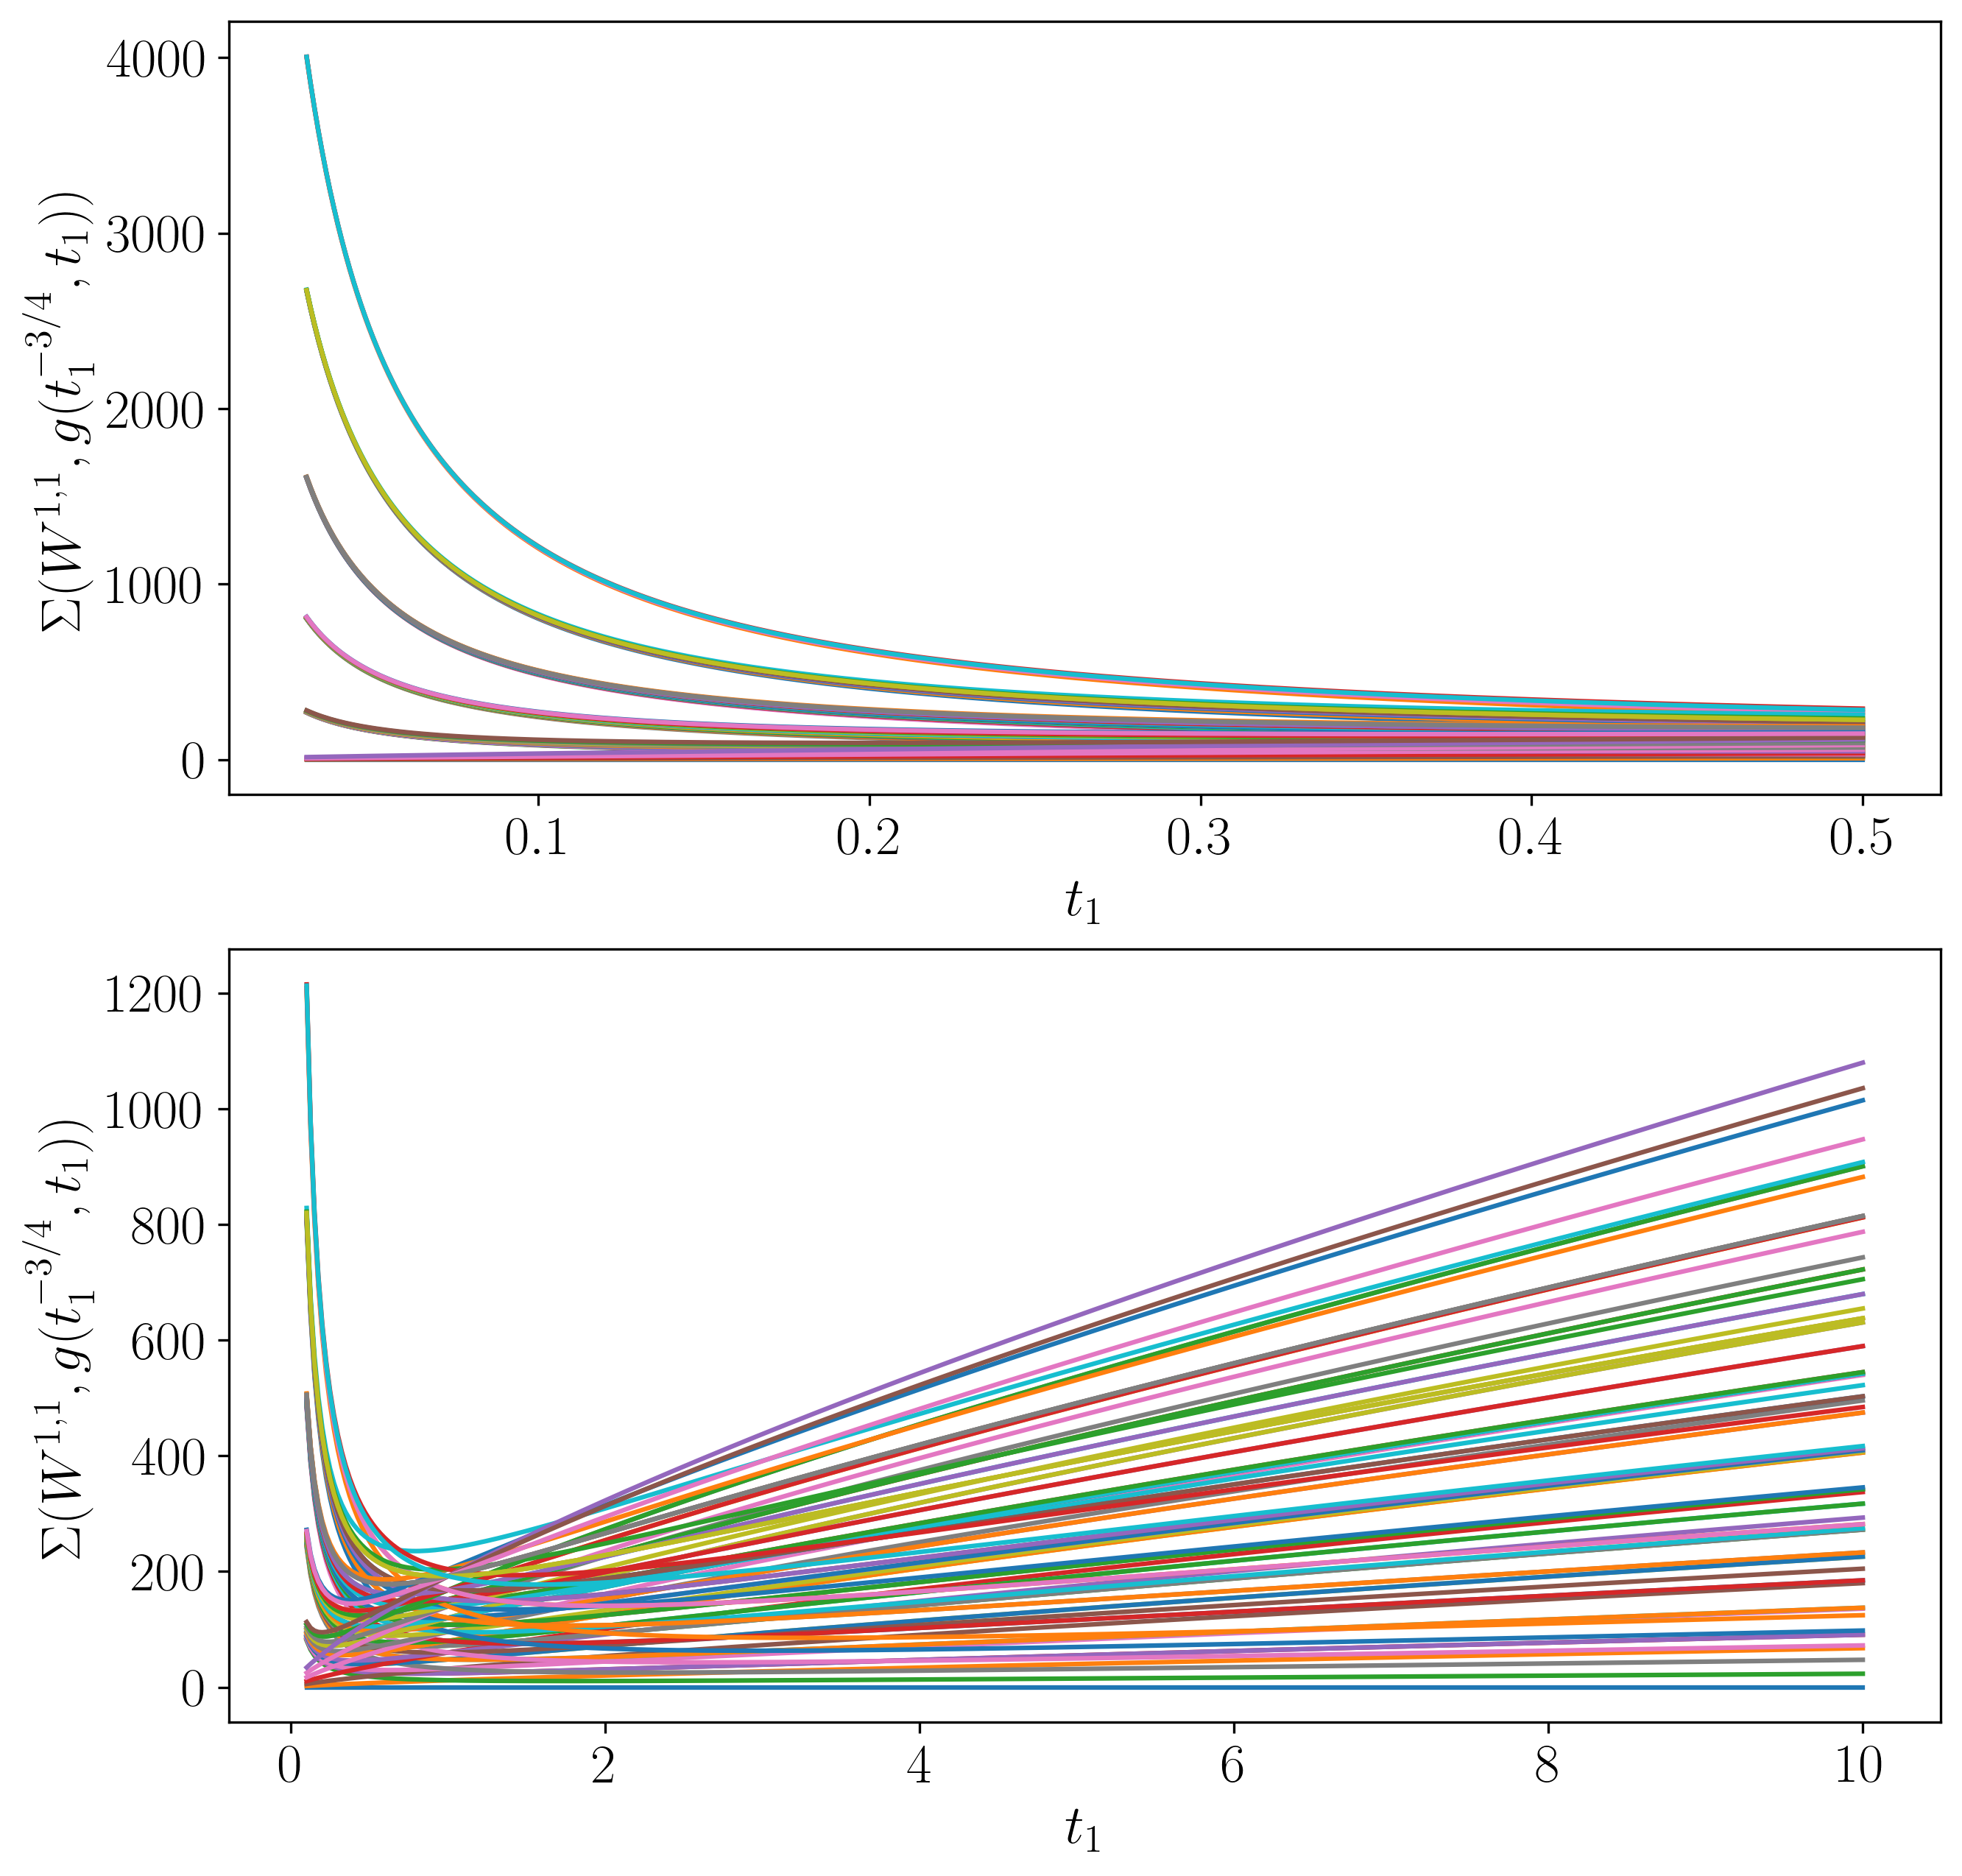

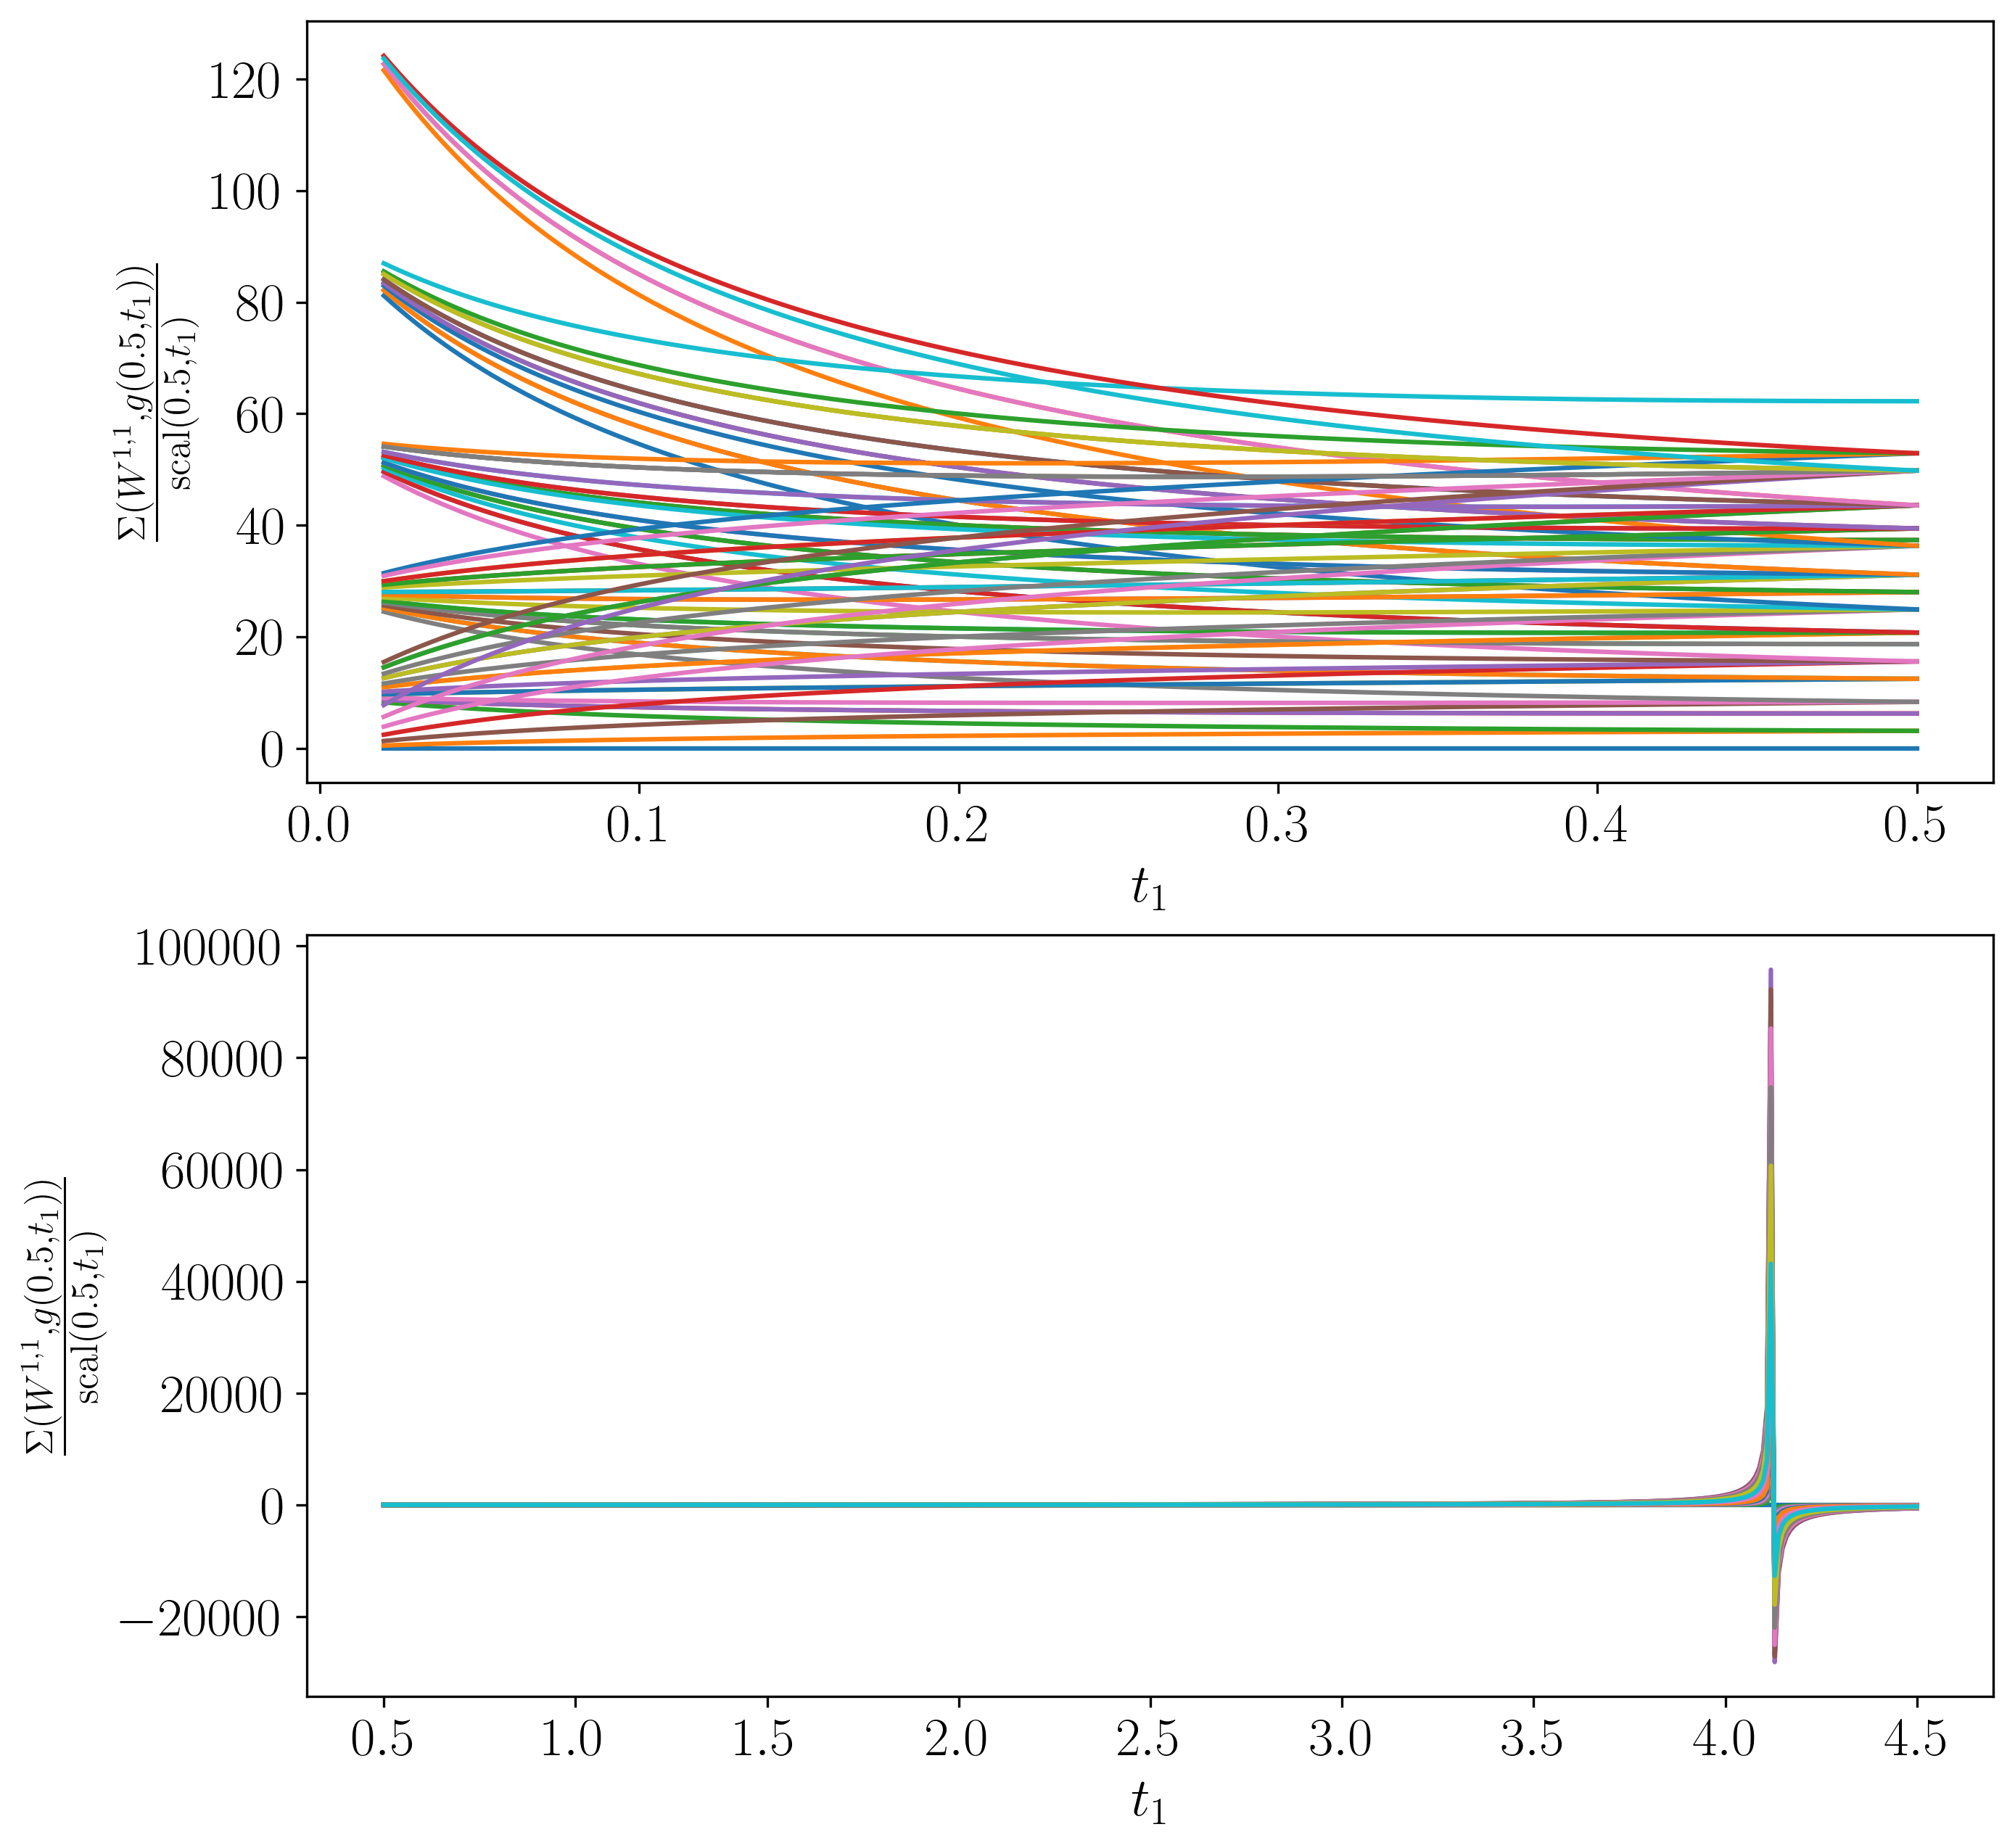

In [6]:
# =============================================================================
# PLOT OF THE EIGENVALUES / SCALAR CURVATURE WITH RESPECT TO t1 WHERE t0 = 0.5 FIXED
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------
#Adapt the labeling of the axis to the latex format (only for optical reasons)
# Enable LaTeX for text handling
plt.rcParams["text.usetex"] = True
# Set the font size
plt.rcParams['font.size'] = 18
# Set the font family to serif to resemble LaTeX default
plt.rcParams['font.family'] = 'serif'
#------------------------------------------------------------------------------



# Save the parameters (z1,z2,z3) which are going to define functions in a list:
#ACHTUNG DAS MUSS NOCH ANGEPASST WERDEN; LETZTE ZAHL IST DANN NICHT MEHR IMMER GERADE!!!
funcs=[
(0, 0, 0),
(2, 1, 0),
(2, 1, 1),
(3, 0, 1),
(3, 3, 1),
(4, 2, 0),
(4, 2, 1),
(4, 2, 2),
(5, 1, 1),
(5, 1, 2),
(5, 4, 1),
(5, 4, 2),
(6, 0, 2),
(6, 3, 0),
(6, 3, 1),
(6, 3, 2),
(6, 3, 3),
(6, 6, 2),
(7, 2, 1),
(7, 2, 2),
(7, 2, 3),
(7, 5, 1),
(7, 5, 2),
(7, 5, 3),
(8, 1, 2),
(8, 1, 3),
(8, 4, 0),
(8, 4, 1),
(8, 4, 2),
(8, 4, 3),
(8, 4, 4),
(8, 7, 2),
(8, 7, 3),
(9, 0, 3),
(9, 3, 1),
(9, 3, 2),
(9, 3, 3),
(9, 3, 4),
(9, 6, 1),
(9, 6, 2),
(9, 6, 3),
(9, 6, 4),
(9, 9, 3),
(10, 2, 2),
(10, 2, 3),
(10, 2, 4),
(10, 5, 0),
(10, 5, 1),
(10, 5, 2),
(10, 5, 3),
(10, 5, 4),
(10, 5, 5),
(10, 8, 2),
(10, 8, 3),
(10, 8, 4),
(11, 1, 3),
(11, 1, 4),
(11, 4, 1),
(11, 4, 2),
(11, 4, 3),
(11, 4, 4),
(11, 4, 5),
(11, 7, 1),
(11, 7, 2),
(11, 7, 3),
(11, 7, 4),
(11, 7, 5),
(11, 10, 3),
(11, 10, 4),
(12, 0, 4),
(12, 3, 2),
(12, 3, 3),
(12, 3, 4),
(12, 3, 5),
(12, 6, 0),
(12, 6, 1),
(12, 6, 2),
(12, 6, 3),
(12, 6, 4),
(12, 6, 5)
      ]

t0=r1=0.5

#we plot the eigenvalues with respect to t1<2, t0=2 is fixed.
def η(z1,z2,z3,t1,t0):
    return (4* (z3**2 + z3) * (1/t1 - 1/t0) + 4 * (z1**2 + z2**2 - z1 * (z2 - 3)) / (3 * t0)) #r1=(t1*t0)/(4*(t0-t1)) has been substituted
#scalar curvature
def scal(t1,t0):
    return 0.428571428571429*t1/t0**2 + 4*(-1.5*t1 + 6.0*t0)/(7*t0**2) + 0.857142857142857/t1

#a) unmodified eigenvalues
t1_values1a = np.linspace(0.03, 0.5, 400)  #400 values between 0.08 and 0.2
t1_values2a = np.linspace(0.25, 2.5, 400)     #400 values between 0.6 and 2

#b) eigenvalues, vol is constant
t1_values1b = np.linspace(0.03, 0.5, 400)  #400 values between 0.08 and 0.2
t1_values2b = np.linspace(0.1, 10, 400)     #400 values between 0.6 and 2

#c) eigenvalues/scalarcurvature
t1_values1c = np.linspace(0.02, 0.5, 400)  #400 values between 0.08 and 0.2
t1_values2c = np.linspace(0.5, 4.5, 400)     #400 values between 0.6 and 2



#----------------------------------------------------------------------------------------------
#a) Plot η(z1,z2,z3, t1_values1)
fig, (ax2,ax1) = plt.subplots(2, 1, figsize=(10,10),dpi=300)  # Change the size of the diagrams
for a in funcs:
    z1,z2,z3=a
    ax1.plot(t1_values2a, η(z1,z2,z3, t1_values2a,t0)) #functions for the second graph, domain between 0.8 and 2
for a in funcs:
    z1,z2,z3 = a 
    ax2.plot(t1_values1a, η(z1,z2,z3, t1_values1a,t0))   #functions for the first graph domain between 0.08 and 0.2


# Add label to x-axis
ax1.set_ylabel(r"$\Sigma(W^{1,1},g(0.5,t_{1}))$")
ax1.set_xlabel(r"$t_{1}$")
ax2.set_ylabel(r"$\Sigma(W^{1,1},g(0.5,t_{1}))$")
ax2.set_xlabel(r"$t_{1}$")

fig.savefig("eigenvalues_unmodified.png", bbox_inches='tight', dpi=200)

#----------------------------------------------------------------------------------------------

#b) Plot η(z1,z2,z3, t1_values1) where vol=const
fig, (ax2,ax1) = plt.subplots(2, 1, figsize=(10,10),dpi=300)  # Change the size of the diagrams
for a in funcs:
    z1,z2,z3=a
    ax1.plot(t1_values2b, η(z1,z2,z3, t1_values2b,t1_values2b**(-3/4))) #functions for the second graph, domain between 0.8 and 2
for a in funcs:
    z1,z2,z3 = a 
    ax2.plot(t1_values1b, η(z1,z2,z3, t1_values1b,t1_values1b**(-3/4)))                  #functions for the first graph domain between 0.08 and 0.2


# Add label to x-axis
ax1.set_ylabel(r"$\Sigma(W^{1,1},g(t_{1}^{-3/4},t_{1}))$")
ax1.set_xlabel(r"$t_{1}$")
ax2.set_ylabel(r"$\Sigma(W^{1,1},g(t_{1}^{-3/4},t_{1}))$")
ax2.set_xlabel(r"$t_{1}$")

fig.savefig("eigenvalues_vol_const.png", bbox_inches='tight', dpi=300)

#----------------------------------------------------------------------------------------------

#c) Plot η(z1,z2,z3, t1_values1)/scal(t1_values1,t0)
fig, (ax2,ax1) = plt.subplots(2, 1, figsize=(10,10),dpi=300)  # Change the size of the diagrams
for a in funcs:
    z1,z2,z3=a
    ax1.plot(t1_values2c, η(z1,z2,z3, t1_values2c,t0)/scal(t1_values2c,t0)) #functions for the second graph, domain between 0.8 and 2
for a in funcs:
    z1,z2,z3 = a 
    ax2.plot(t1_values1c, η(z1,z2,z3, t1_values1c,t0)/scal(t1_values1c,t0))                  #functions for the first graph domain between 0.08 and 0.2


# Add label to x-axis
ax1.set_ylabel(r"$\frac{\Sigma(W^{1,1},g(0.5,t_{1}))}{\mathrm{scal}(0.5,t_1)}$")
ax1.set_xlabel(r"$t_{1}$")
ax2.set_ylabel(r"$\frac{\Sigma(W^{1,1},g(0.5,t_{1}))}{\mathrm{scal}(0.5,t_1)}$")
ax2.set_xlabel(r"$t_{1}$")

#----------------------------------------------------------------------------------------------

fig.savefig("eigenvalues_total_curvature.png", bbox_inches='tight', dpi=300)   #saves the plots
plt.show()

In [2]:
from sympy import groebner, QQ, symbols
import sympy as sp

u,y, z, λ = symbols('u y z λ')
u=1
# Rewriting the equations with exact rational numbers
a = sp.expand(u*(y*z - y/z - 2*λ + 6 - z/y)*y*z)
b = sp.expand(y*z*(-1/2*y**2*λ - y*z + 6*y - y/z + z/y))
c = sp.expand((-y*z + y/z - 1/2*z**2*λ + 6*z - z/y)*y*z)
d = sp.expand(λ*(1/2*y**2 + 1/2*z**2 + 2)*y*z)
e=u*y*z*λ-1

#Compute Gröbner basis
basis = groebner([a-b, b-c, c-d], y, z, λ, domain=QQ, order='lex')
B=list(basis)



equations = [sp.Eq(expr, 0) for expr in B]


# Substitute u=1 in the equations
values_to_substitute = {}
equations_substituted = [eq.subs(values_to_substitute) for eq in equations]
print(equations_substituted)
#"""
# Solve the substituted equations
solutions_substituted = sp.solve(equations_substituted, (λ,y,z))

print(solutions_substituted)

[Eq(y**2 - 65995375*z**3*λ**6/606042976 + 1076563275*z**3*λ**5/1212085952 - 198484635*z**3*λ**4/43288784 + 20952049491*z**3*λ**3/1212085952 - 24600500249*z**3*λ**2/606042976 + 33522003267*z**3*λ/606042976 - 1068189321*z**3/37877686 + 7182395601121865*z**2*λ**9/1937285617066770432 - 595885171106019001*z**2*λ**8/52952473533158391808 - 682351753399377821*z**2*λ**7/264762367665791959040 + 10107916454917832101*z**2*λ**6/33095295958223994880 - 63927331029589051721*z**2*λ**5/28367396535620567040 + 520901694961112103913*z**2*λ**4/66190591916447989760 - 4677267822260316359*z**2*λ**3/270165681291624448 + 16235177801249611993*z**2*λ**2/827382398955599872 - 3188480374388109733*z**2*λ/387835499510437440 - z**2, 0), Eq(y*z - 649216175*z**3*λ**6/7272515712 + 10326846385*z**3*λ**5/14545031424 - 2556772733*z**3*λ**4/692620544 + 4216121265*z**3*λ**3/303021488 - 237260647825*z**3*λ**2/7272515712 + 21004730335*z**3*λ/454532232 - 462682399*z**3/18938843 + 5609854148876765*z**2*λ**9/1073360949996453888 - 51

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the regions for t_1
t1_values_1 = np.linspace(1/5, 1, 500)
t1_values_2 = np.linspace(0, 1/5, 200)
t1_values_3 = np.linspace(1, 2, 200)

# Define the first estimate functions
lichnerowicz_1 = 7/(3*t1_values_1) + 14*t1_values_1/3
lichnerowicz_2 = 14 - 7*t1_values_2
lichnerowicz_3 = 14 - 7*t1_values_3

# Plotting the estimates along with the actual eigenvalue, with emphasis on [NaSe23] matching the actual value for t1 > 1
plt.figure(figsize=(10, 6))

plt.plot(t1_values, lichnerowicz_values, label="$\eta_{1}(g_{0.5,t_{1}})$: Lichnerowicz Estimate", color='blue')
plt.plot(t1_values_all, nase_values_corrected, label="$\eta_{1}(g_{0.5,t_{1}})$: [NaSe23] Estimate", color='red')
plt.plot(t1_values_all, actual_values, label="$\eta_{1}(g_{0.5,t_{1}})$: Actual Eigenvalue", color='green')

# Highlight the section where [NaSe23] estimate matches the actual eigenvalue for t1 > 1
t1_highlight = np.linspace(1, 2, 200)
actual_highlight = np.array([actual_eigenvalue(t1) for t1 in t1_highlight])
plt.plot(t1_highlight, actual_highlight, color='orange', linestyle='-', linewidth=2)

plt.xlabel("$t_1$")
plt.ylabel("$\eta_{1}(g_{0.5,t_{1}})$")
plt.title("Comparison of Estimates for $\eta_{1}(g_{0.5,t_{1}})$")
plt.legend()
plt.grid(True)

plt.show()


NameError: name 'plt' is not defined

In [4]:
from sympy import symbols, solve, Rational, simplify

# Define the variables
n, t1 = symbols('n t1', real=True, positive=True)

# Define the new inequality
inequality2 = (2 * n * t1**2 * (4 * n + 3) + 4 * n + 3) / (t1 * (2 * n + 1)) - 8 * (n + 1)

# Simplify the inequality
inequality2_simplified = simplify(inequality2)

# Solve the inequality for t1
solution2 = solve(inequality2_simplified > 0, t1)

# Print the solution for t1
print("Solution for t1:", solution2)

# Set t1 = 1/2 and solve for n
t1_value = Rational(1, 2)
inequality_at_t1_half = inequality2_simplified.subs(t1, t1_value)

# Solve the resulting inequality for n
n_solution = solve(inequality_at_t1_half > 0, n)

# Print the solution for n
print("Solution for n:", n_solution)


NotImplementedError: 
The inequality, (4*n + x**2*(8*n**2 + 6*n) + x*(-16*n**2 - 24*n - 8) +
3)/(x*(2*n + 1)) > 0, cannot be solved using
solve_univariate_inequality.

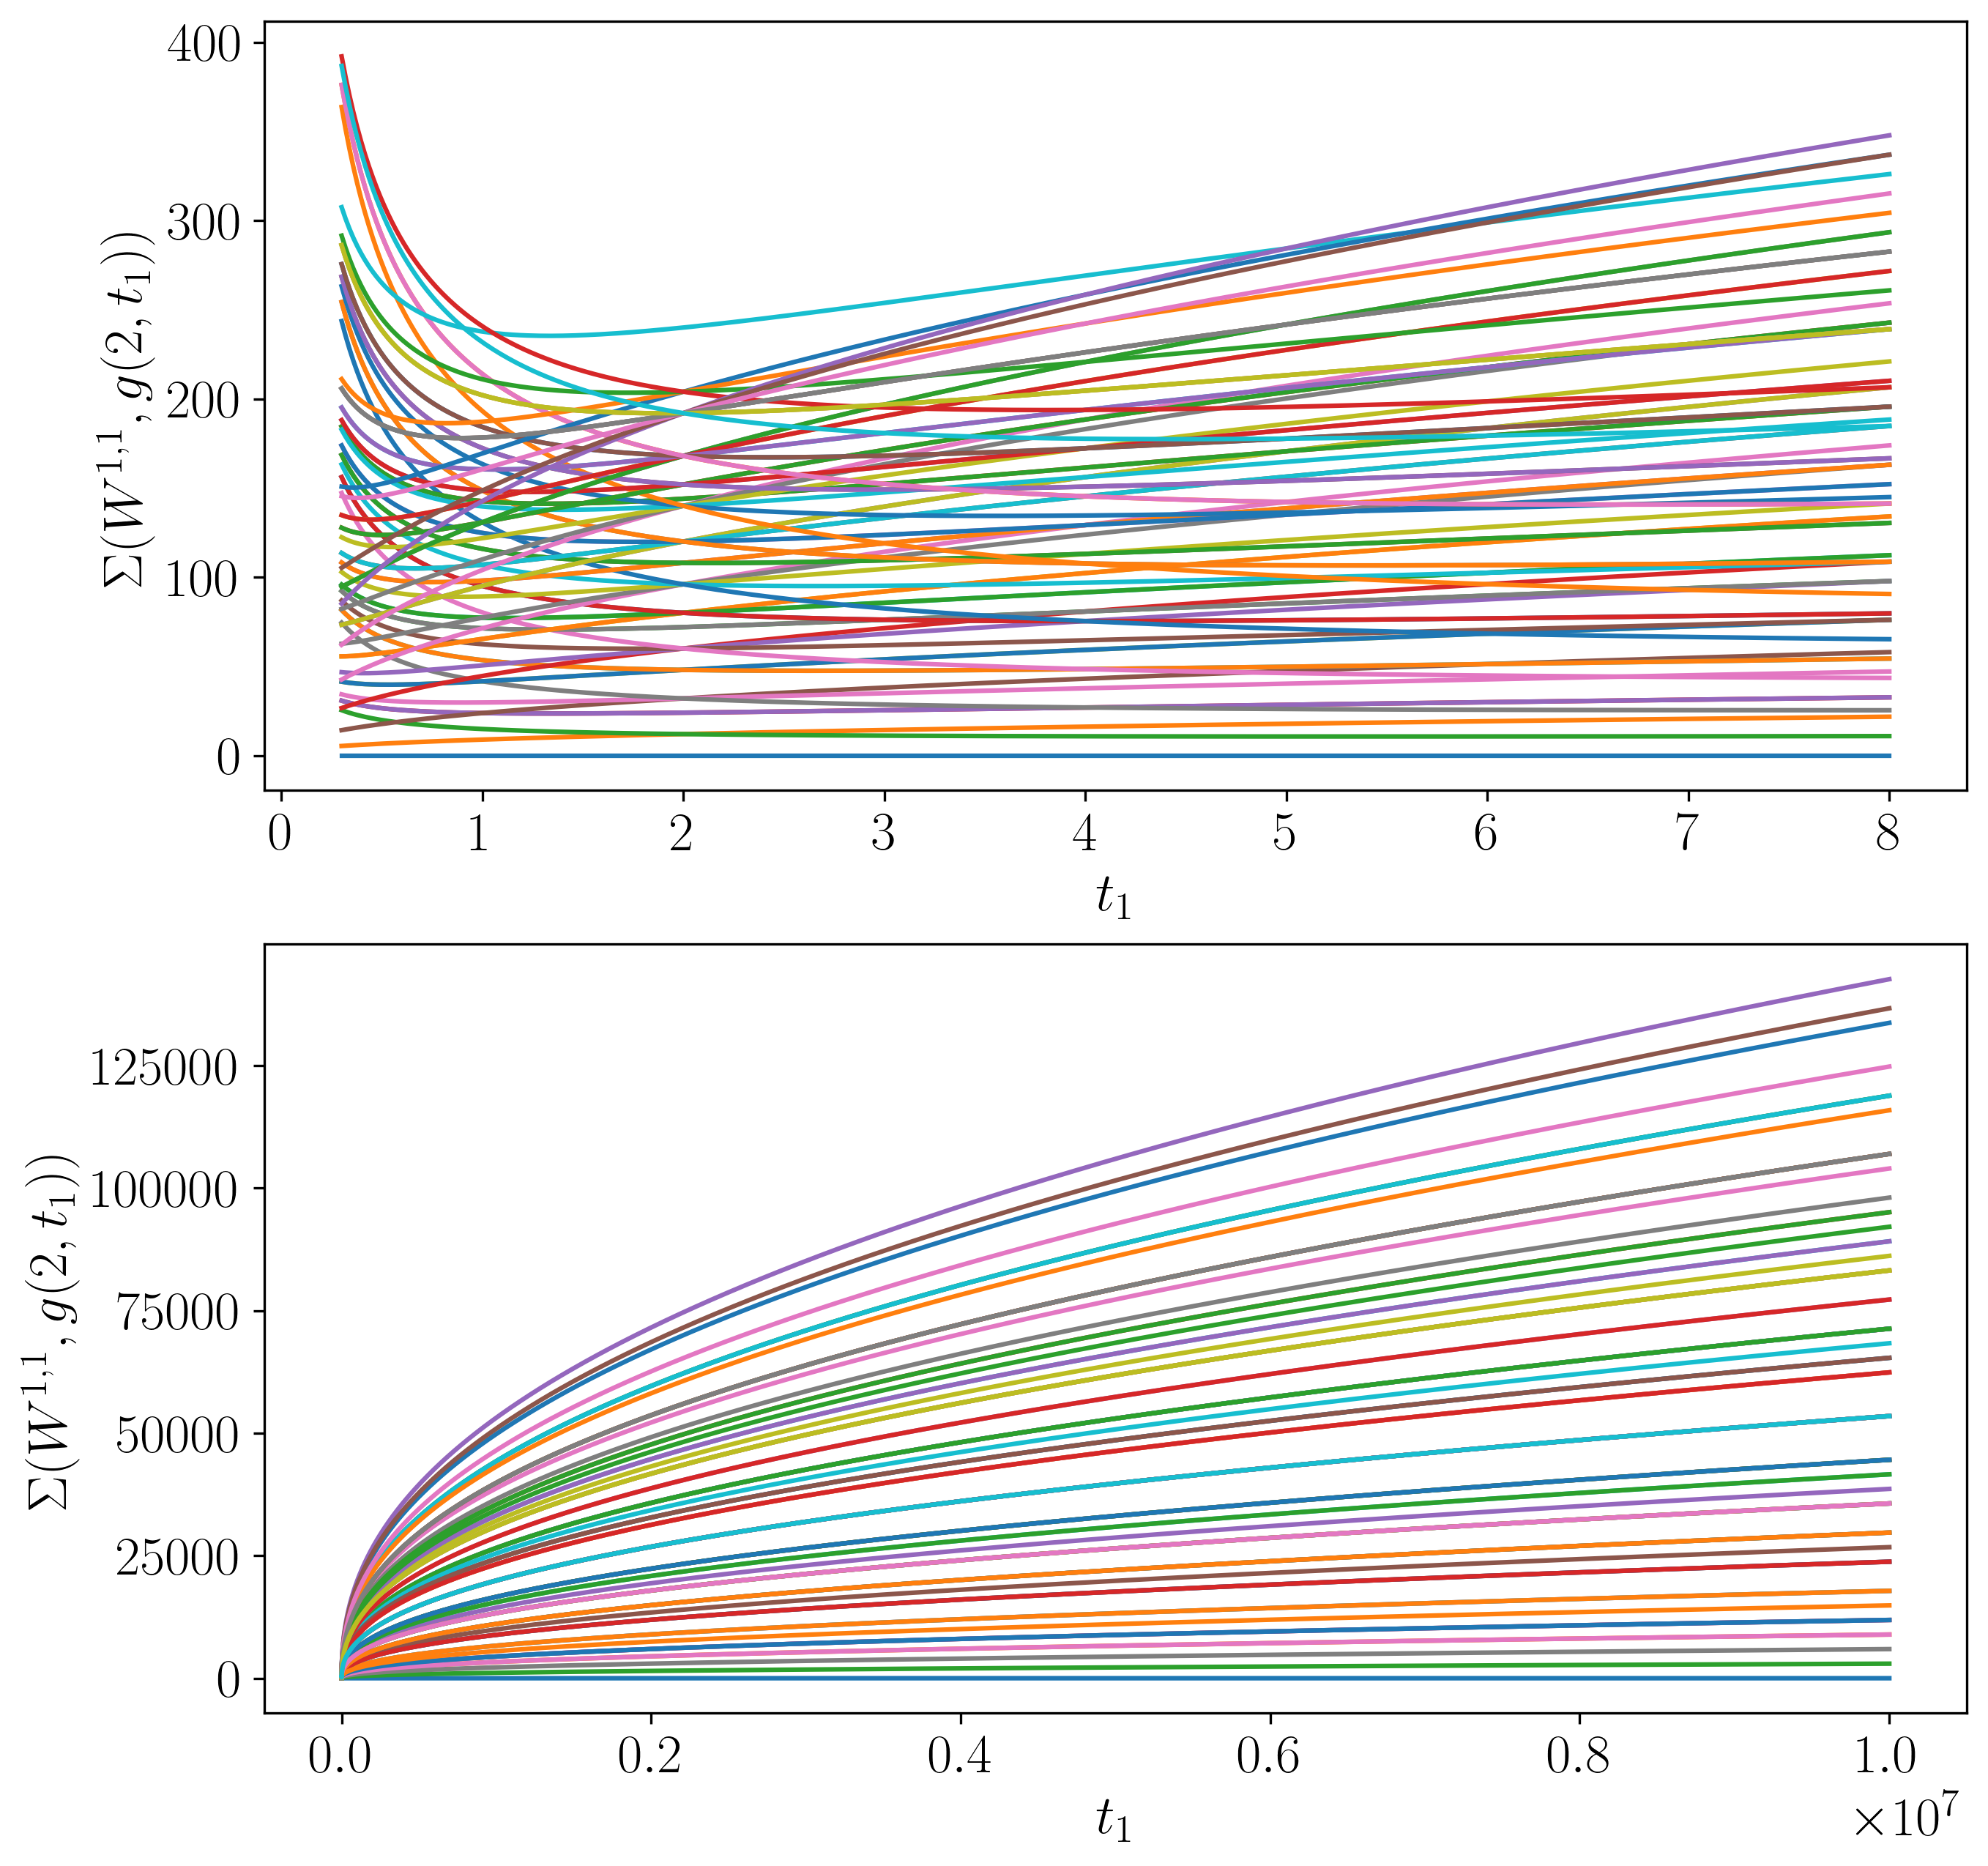

In [2]:
# =============================================================================
# PLOT OF THE EIGENVALUES WITH RESPECT TO t1 < 2 WHERE t0 = 2 FIXED
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------
#Adapt the labeling of the axis to the latex format (only for optical reasons)
# Enable LaTeX for text handling
plt.rcParams["text.usetex"] = True
# Set the font size
plt.rcParams['font.size'] = 18
# Set the font family to serif to resemble LaTeX default
plt.rcParams['font.family'] = 'serif'
#------------------------------------------------------------------------------

#We plot two different parts of the function:
t1_values1 = np.linspace(0.3, 8, 400)  #400 values between 0.3 and 8
t1_values2 = np.linspace(10000000, 2.7, 10000000+1)     #400 values between 0.7 and 2.7
t0=2

#we plot the eigenvalues with respect to t1<2, t0=2 is fixed.
def η(z1,z2,z3,t1):
    return ((4 * (z3**2 + z3) * (t0 - t1)) / (t1 * t0) + 4 * (z1**2 + z2**2 - z1 * (z2 - 3)) / (3 * t0))*(t0**2*t1**1.5)**(2/7) #r1=(t1*t0)/((t0-t1)) has been substituted

# Save the parameters (z1,z2,z3) which are going to define functions in a list:
funcs=[
(0, 0, 0),
(2, 1, 0),
(2, 1, 1),
(3, 0, 1),
(3, 3, 1),
(4, 2, 0),
(4, 2, 1),
(4, 2, 2),
(5, 1, 1),
(5, 1, 2),
(5, 4, 1),
(5, 4, 2),
(6, 0, 2),
(6, 3, 0),
(6, 3, 1),
(6, 3, 2),
(6, 3, 3),
(6, 6, 2),
(7, 2, 1),
(7, 2, 2),
(7, 2, 3),
(7, 5, 1),
(7, 5, 2),
(7, 5, 3),
(8, 1, 2),
(8, 1, 3),
(8, 4, 0),
(8, 4, 1),
(8, 4, 2),
(8, 4, 3),
(8, 4, 4),
(8, 7, 2),
(8, 7, 3),
(9, 0, 3),
(9, 3, 1),
(9, 3, 2),
(9, 3, 3),
(9, 3, 4),
(9, 6, 1),
(9, 6, 2),
(9, 6, 3),
(9, 6, 4),
(9, 9, 3),
(10, 2, 2),
(10, 2, 3),
(10, 2, 4),
(10, 5, 0),
(10, 5, 1),
(10, 5, 2),
(10, 5, 3),
(10, 5, 4),
(10, 5, 5),
(10, 8, 2),
(10, 8, 3),
(10, 8, 4),
(11, 1, 3),
(11, 1, 4),
(11, 4, 1),
(11, 4, 2),
(11, 4, 3),
(11, 4, 4),
(11, 4, 5),
(11, 7, 1),
(11, 7, 2),
(11, 7, 3),
(11, 7, 4),
(11, 7, 5),
(11, 10, 3),
(11, 10, 4),
(12, 0, 4),
(12, 3, 2),
(12, 3, 3),
(12, 3, 4),
(12, 3, 5),
(12, 6, 0),
(12, 6, 1),
(12, 6, 2),
(12, 6, 3),
(12, 6, 4),
(12, 6, 5)
      ]

# Plot functions
fig, (ax2,ax1) = plt.subplots(2, 1, figsize=(10,10),dpi=300)  # Change the size of the diagrams
for a in funcs:
    z1,z2,z3=a
    ax1.plot(t1_values2, η(z1,z2,z3, t1_values2),label=(z1,z2,z3)) #functions for the second graph, domain between 0.8 and 2
for a in funcs:
    z1,z2,z3 = a 
    ax2.plot(t1_values1, η(z1,z2,z3, t1_values1))                  #functions for the first graph domain between 0.08 and 0.2


# Add label to x-axis
ax1.set_ylabel(r"$\Sigma(W^{1,1},g(2,t_{1}))$")
ax1.set_xlabel(r"$t_{1}$")
ax2.set_ylabel(r"$\Sigma(W^{1,1},g(2,t_{1}))$")
ax2.set_xlabel(r"$t_{1}$")

#fig.savefig("eigenvalues_plot 400 dpi.png", bbox_inches='tight', dpi=300)   #saves the plots
plt.show()